# Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Checking matplotlib version
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Creating a path
path = r"C:\Users\Akira\Documents\Advanced Analytics and Dashboard Design Project"

## Importing Dataframe

In [5]:
df_NBA = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'NBA.csv'),index_col = False)

## Checking Data Profile

In [6]:
df_NBA.columns

Index(['player_name', 'team_abbreviation', 'Team City', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [7]:
df_NBA.dtypes

player_name           object
team_abbreviation     object
Team City             object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct              object
dreb_pct              object
usg_pct               object
ts_pct                object
ast_pct               object
season                object
dtype: object

In [8]:
df_NBA.shape

(12844, 22)

In [9]:
df_NBA.head()

,player_name,team_abbreviation,Team City,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,Houston,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,4%,4%,4%,4%,4%,1996-97
1,Gaylon Nickerson,WAS,Washington,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,3%,11%,17%,50%,3%,1996-97
2,George Lynch,VAN,Vancouver,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,11%,19%,18%,51%,11%,1996-97
3,George McCloud,LAL,Los Angeles,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,3%,11%,21%,53%,3%,1996-97
4,George Zidek,DEN,Denver,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,10%,17%,20%,50%,10%,1996-97


# Exploring correlation relationships
### Creating with madlib

In [10]:
corr_columns = ['age', 'player_height', 'player_weight', 'gp',
                'pts', 'reb', 'ast']

In [11]:
df_NBA_corr = df_NBA[corr_columns]

In [12]:
df_NBA_corr.corr()

,age,player_height,player_weight,gp,pts,reb,ast
age,1.000000,-0.007904,0.063561,0.057442,0.011353,0.037386,0.092359
player_height,-0.007904,1.000000,0.822141,0.004963,-0.055284,0.424220,-0.442781
player_weight,0.063561,0.822141,1.000000,0.022828,-0.025023,0.438112,-0.371675
gp,0.057442,0.004963,0.022828,1.000000,0.536003,0.471405,0.382726
pts,0.011353,-0.055284,-0.025023,0.536003,1.000000,0.624509,0.664320
reb,0.037386,0.424220,0.438112,0.471405,0.624509,1.000000,0.247841
ast,0.092359,-0.442781,-0.371675,0.382726,0.664320,0.247841,1.000000


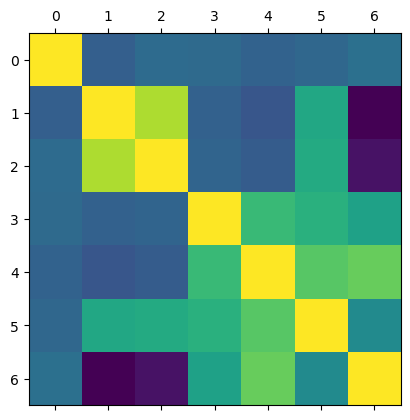

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_NBA_corr.corr())
plt.show()

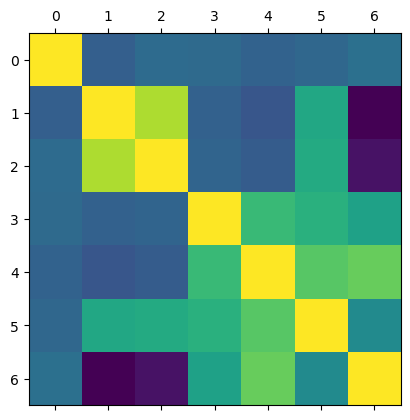

In [14]:
# Save figure
plt.matshow(df_NBA_corr.corr())
plt.savefig("out.png") 

In [15]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Akira\\Documents\\Advanced Analytics and Dashboard Design Project\\Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

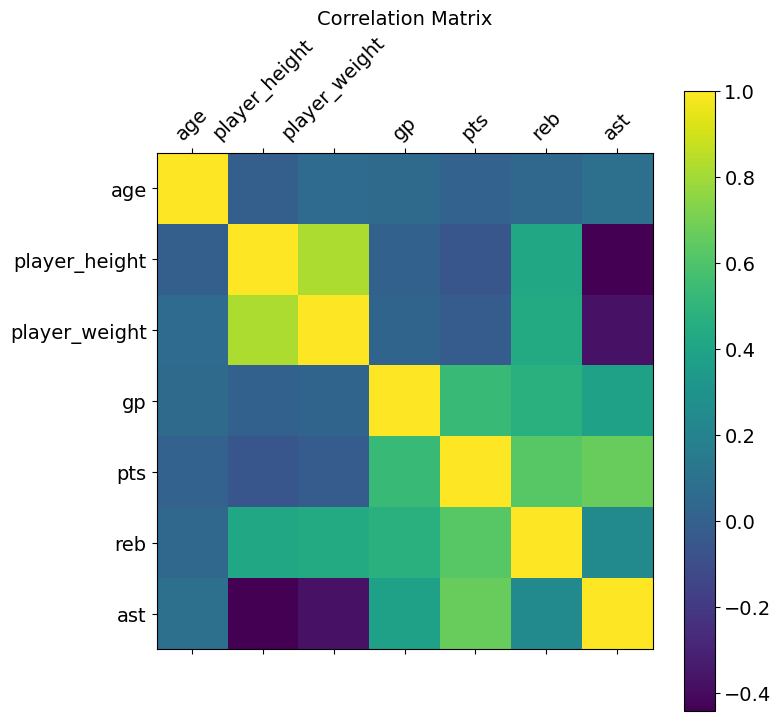

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_NBA_corr.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_NBA_corr.shape[1]), df_NBA_corr.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_NBA_corr.shape[1]), df_NBA_corr.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In this heatmap, we are exploring the relationships between variables in NBA players statistics and characteristics. The brighter yellow/green color means there is a positive relationship between the two coefficients, and the darker blue represents a negative relationship between coefficients.


### Creating with sealab

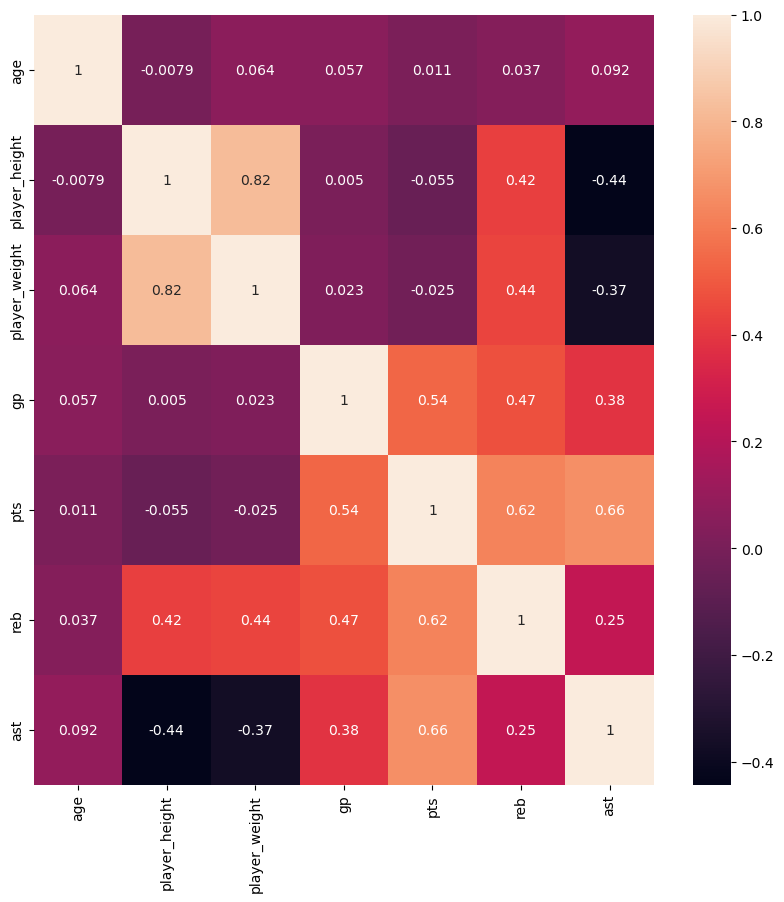

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_NBA_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap

In this heatmap made with sealab, it is a different view that shows the exact numbers to see how strong the relationship may be. 

## Displaying relationships using scatterplots


C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


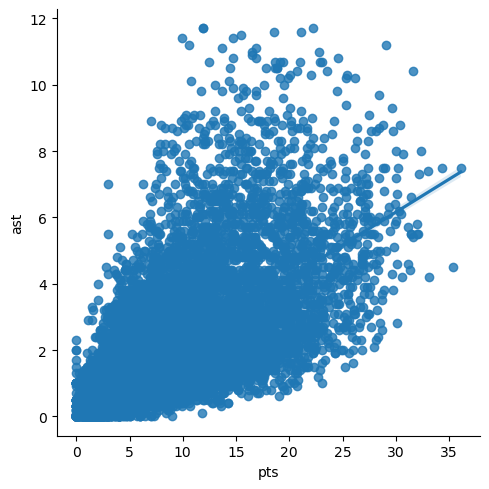

In [18]:
#looking at the relationship between points and assists
sns.lmplot(x = 'pts', y = 'ast', data = df_NBA)

Observing this scatterplot between assists and points, there is a positive correlation that players who score higher will gather more assists throughout a season

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


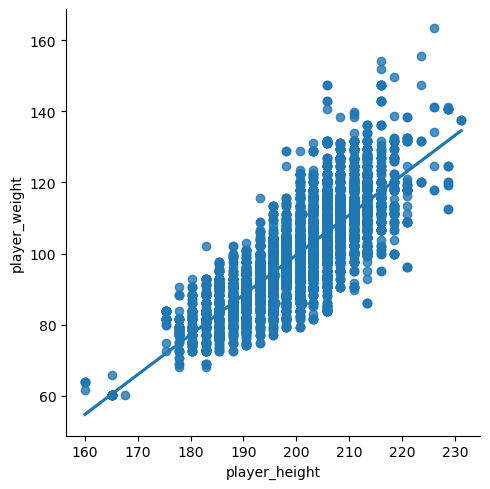

In [19]:
#looking at the relationship between height and weight
sns.lmplot(x = 'player_height', y = 'player_weight', data = df_NBA)

This observation is somewhat of a given, when players are taller they will usually weight more due to sheer size.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


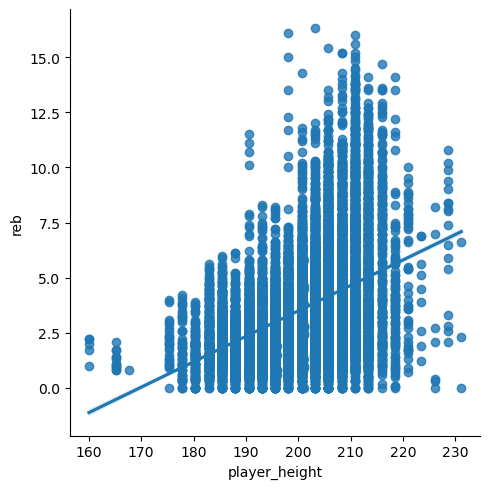

In [20]:
#looking at the relationship between height and rebounds
sns.lmplot(x = 'player_height', y = 'reb', data = df_NBA)

Looking at this relationship, there is more of a bell curve relationship rather than a definitive positive relationship between height and rebounds. I believe this is due to players that are too tall having issues gaining the weight to be strong enough to gather rebounds.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


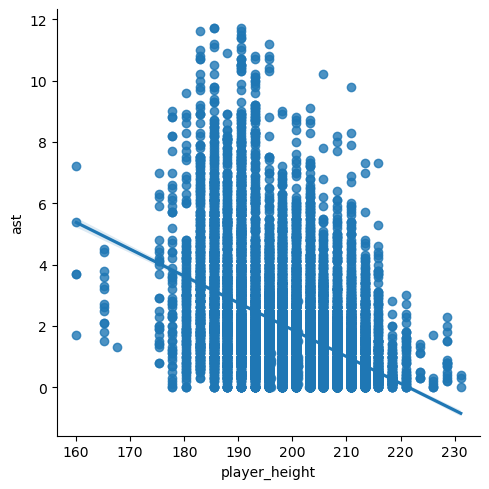

In [21]:
#looking at the relationship between height and assists
sns.lmplot(x = 'player_height', y = 'ast', data = df_NBA)

Through this scatterplot, I can see that there is a height of assists for players based on height does have a negative correlation as the taller players do not seem to average many assists.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


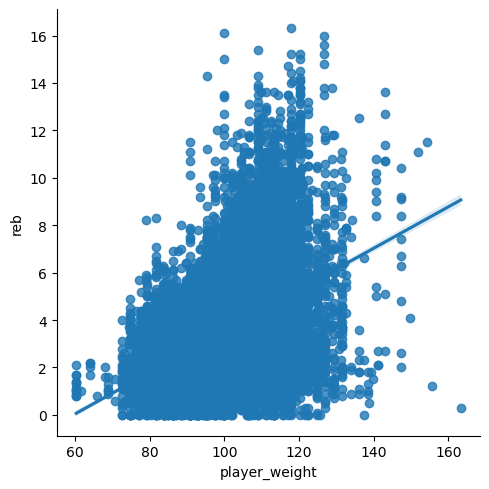

In [22]:
#looking at the relationship between weight and reb
sns.lmplot(x = 'player_weight', y = 'reb', data = df_NBA)

Based on this visualization, I can observe that there is not necessarily a positive correlation of player weight and rebounds as the heavier the player is the less rebounds the player is obtaining.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


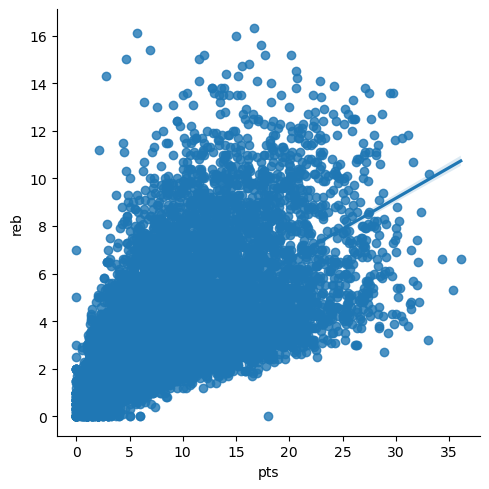

In [23]:
#looking at the relationship between points and reb
sns.lmplot(x = 'pts', y = 'reb', data = df_NBA)

Based on this observation, I can see that players who score more do not tend to have higher rebounds. It seems more scattered and it can be observed that players who score less are impacting the game through rebounds.

## Creating a pair plot

In [24]:
sub = df_NBA_corr[['player_height', 'gp', 'pts', 'ast' , 'reb']]

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


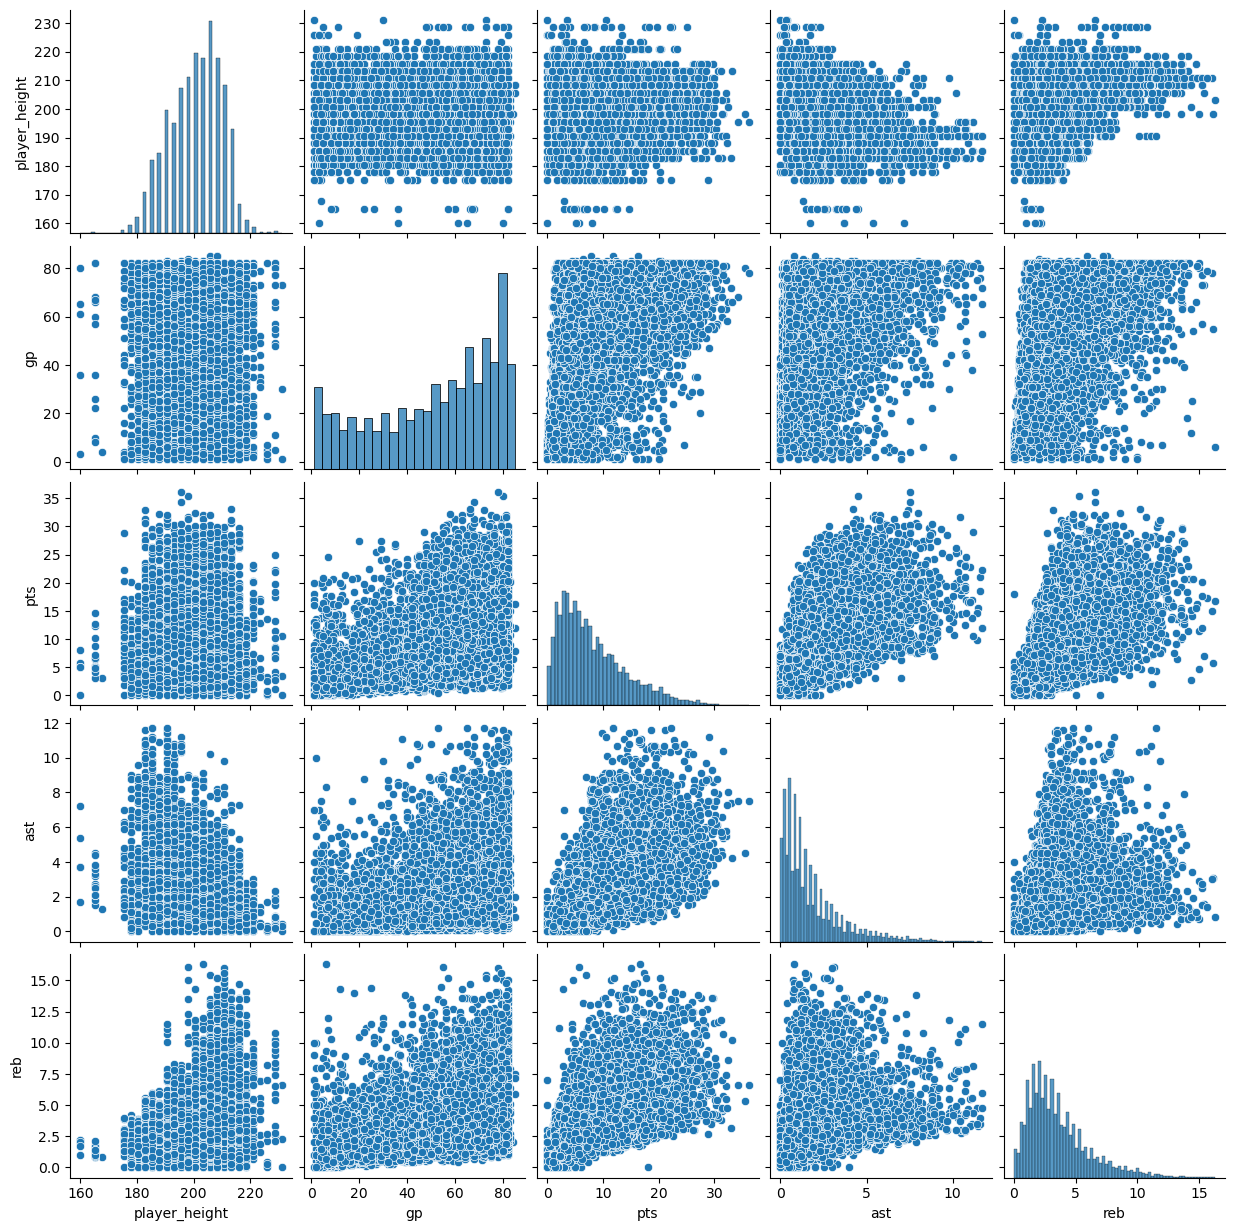

In [25]:
# Create a pair plot 

g = sns.pairplot(sub)

Based on the pair plots, there are several relationships I would like to explore more.

1) The first relationship I am interested in is player heights and rebounds. Based on the visual, I can see that there is a decrease in rebounds for players that are in the highest height category. It breaks the thought process of "the taller you are the easier it is to get rebounds), and I am curious why is there a trend of decreasing rebounds for very tall players.

2) The second relationshiop I want to explore is points and games played. This is interesting because lately in the NBA there has been a debate on "load management" and players not playing in order to preserve their bodies. However I see some outliers that play a lot of games with high point averages, meaning they do not lose any sort of strength in playing games, and I want to see what their overall success is like in the NBA.

3) The third relationship I want to see is assists and rebounds. I see certain outlier players that have shown to have a high count of rebounds and assists. As those two aspects are very key in winning games, I would like to see who those players are, what their salary is, and how they impact games. This could lead to finding key players that are not described as "superstars" but are very key pieces to winning games.

### Creating a categorical plot that will split the "points" column into categories

In [26]:
df_NBA.loc[df_NBA['pts'] < 10, 'Point category'] = 'Low Scoring'

C:\Users\Akira\AppData\Local\Temp\ipykernel_21280\941274959.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low Scoring' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_NBA.loc[df_NBA['pts'] < 10, 'Point category'] = 'Low Scoring'


In [27]:
df_NBA.loc[(df_NBA['pts'] >= 10) & (df_NBA['pts'] < 20), 'Point category'] = 'Average Scoring'

In [28]:
df_NBA.loc[df_NBA['pts'] >= 20, 'Point category'] = 'High Scoring'

In [29]:
df_NBA['Point category'].value_counts(dropna = False)

Point category
Low Scoring        8808
Average Scoring    3317
High Scoring        719
Name: count, dtype: int64

In [46]:
xticks = np.arange(0, 81, 10)

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

([<matplotlib.axis.XTick at 0x114df8a9490>,
 [Text(0, 0, '1'),
  Text(10, 0, '11'),
  Text(20, 0, '21'),
  Text(30, 0, '31'),
  Text(40, 0, '41'),
  Text(50, 0, '51'),
  Text(60, 0, '61'),
  Text(70, 0, '71'),
  Text(80, 0, '81')])

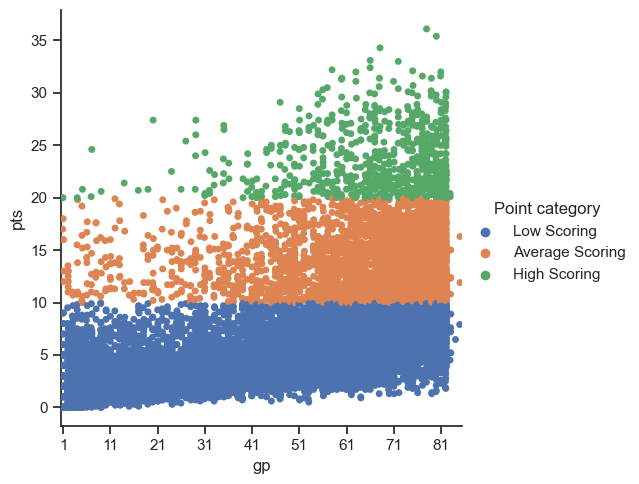

In [47]:
# Create a categorical plot in seaborn using the point categories created above

sns.set(style="ticks")
g = sns.catplot(x="gp", y="pts", hue="Point category", data=df_NBA)
plt.xticks(xticks)

In [48]:
# fig = g.get_figure()
g.savefig("pts_gp_categorical chart.png") 

# Again, the image will be saved in the working directory. 